## Imports

In [1]:
import numpy as np
import cv2
import os
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.image as mpimg
import time

## Load Dataset

In [2]:
car_filenames = []
not_car_filenames = []

dir_name = './vehicles/vehicles/'
for path, dirs, files in os.walk(dir_name):
    for file in files:
        if file == '.DS_Store' : continue
        name = path  +'/' + file
        car_filenames.append(name)
        
dir_name2 = './non-vehicles/non-vehicles/'
for path, dirs, files in os.walk(dir_name2):
    for file in files:
        if file == '.DS_Store' : continue
        name = path  +'/' + file
        not_car_filenames.append(name)

In [3]:
car_labels = [1] * len(car_filenames)
not_car_labels = [0] * len(not_car_filenames)

## Basic Summary of Dataset

In [4]:
len(car_filenames), len(not_car_filenames)

(8792, 8968)

In [5]:
len(car_labels), len(not_car_labels)

(8792, 8968)

In [6]:
for i in range(5):
    ldx=np.random.randint(len(car_filenames))
    car_filenames_shape=cv2.imread(car_filenames[ldx]).shape
    print(car_filenames_shape)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [7]:
for i in range(5):
    ldx=np.random.randint(len(not_car_filenames))
    car_filenames_shape=cv2.imread(not_car_filenames[ldx]).shape
    print(car_filenames_shape)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


## Visualize Some of the Data

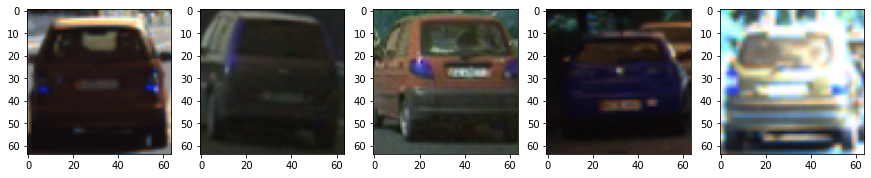

In [8]:
fig = plt.figure(figsize=(15,3))
for i in range(5):
    idx = np.random.randint(len(car_filenames))
    img = cv2.imread(car_filenames[idx])
    plt.subplot(1, 5, i+1)
    plt.imshow(img)

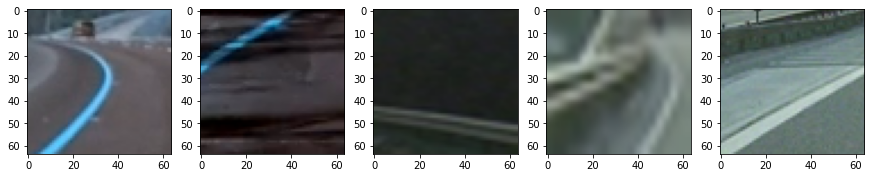

In [9]:
fig = plt.figure(figsize=(15,3))
for i in range(5):
    idx = np.random.randint(len(not_car_filenames))
    img = cv2.imread(not_car_filenames[idx])
    plt.subplot(1, 5, i+1)
    plt.imshow(img)

## Feature Extraction

In [10]:
orient = 9
pixels_per_cell = 8
cells_per_block = 2
spatial = 32
hist_bins = 32

features = []

In [11]:
def resize_f(image, spatial):
    image_f = cv2.resize(image, (spatial, spatial)).ravel()
    return image_f
    
def hist_f(image, bin_size):
    hist1 = cv2.calcHist(images=[image], channels=[0], mask=None, histSize=[bin_size], ranges=[0, 255]).ravel()
    hist2 = cv2.calcHist(images=[image], channels=[1], mask=None, histSize=[bin_size], ranges=[0, 255]).ravel()
    hist3 = cv2.calcHist(images=[image], channels=[2], mask=None, histSize=[bin_size], ranges=[0, 255]).ravel()
       
    hist_f = np.hstack([hist1, hist2, hist3])
    return hist_f

def hog_f(image, orient, pixels_per_cell, cells_per_block):
    hog_feature = hog(image, orientations=orient, pixels_per_cell=(pixels_per_cell,pixels_per_cell),
                                cells_per_block=(cells_per_block,cells_per_block),
                                transform_sqrt=True,
                                visualize=False, feature_vector= True)
    
    return hog_feature


In [12]:
start = time.time() 

for i in range(len(car_filenames)):
    image = mpimg.imread(car_filenames[i])
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    image_features = resize_f(image, spatial)
    
    hist_features = hist_f(image, hist_bins)
    
    ch1=image[:,:,0]
    ch2=image[:,:,1]
    ch3=image[:,:,2]

    hog1 = hog_f(ch1, orient, pixels_per_cell, cells_per_block)
    hog2 = hog_f(ch2, orient, pixels_per_cell, cells_per_block)
    hog3 = hog_f(ch3, orient, pixels_per_cell, cells_per_block)

    features.append(np.hstack([image_features, hist_features, hog1, hog2, hog3]))
    
print("time :", time.time() - start)

time : 101.73310685157776


In [13]:
start = time.time() 

for i in range(len(not_car_filenames)):
    image = mpimg.imread(not_car_filenames[i])
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    image_features = resize_f(image, spatial)
    
    hist_features = hist_f(image, hist_bins)
    
    ch1=image[:,:,0]
    ch2=image[:,:,1]
    ch3=image[:,:,2]

    hog1 = hog_f(ch1, orient, pixels_per_cell, cells_per_block)
    hog2 = hog_f(ch2, orient, pixels_per_cell, cells_per_block)
    hog3 = hog_f(ch3, orient, pixels_per_cell, cells_per_block)

    features.append(np.hstack([image_features, hist_features, hog1,hog2,hog3]))
print("time :", time.time() - start)

time : 104.87329626083374


In [14]:
len(features)

17760

## Data Preparation

In [15]:
features = np.array(features)
labels = np.array(car_labels + not_car_labels)

In [16]:
features.shape

(17760, 8460)

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape

((14208, 8460), (3552, 8460))

## Classifier

In [20]:
start = time.time() 
svm_c = LinearSVC(max_iter=10000)
svm_c.fit(X_train, y_train)
print("time :", time.time() - start)

time : 22.345471620559692


In [21]:
svm_c.score(X_train, y_train)

1.0

In [22]:
pred = svm_c.predict(X_test)
accuracy_score(y_test,pred)

0.9898648648648649

## Data Saving to Pickle

In [23]:
import pickle

In [24]:
dist_pickle={}
dist_pickle["svc"]=svm_c
dist_pickle["scaler"]=scaler
dist_pickle["orient"]=orient
dist_pickle["pix_per_cell"]=pixels_per_cell
dist_pickle["cell_per_block"]=cells_per_block
dist_pickle["spatial"]=spatial
dist_pickle["hist_bins"]=hist_bins
pickle.dump(dist_pickle, open("car_classifier_YCrCb_pickle_final_mpimg_10000.p",'wb'))


print('Classifier parameters saved to file')

Classifier parameters saved to file
